# リバースシステム1を比較する


In [2]:
from backtesting import Backtest
import algotrade as algo


## データ
Backtesting ingests data as a pandas.DataFrame with columns 'Open', 'High', 'Low', 'Close', and (optionally) 'Volume'. 
Such data is easily obtainable (see e.g. pandas-datareader, Quandl, findatapy, ...). 
Your data frames can have other columns, but these are necessary. 
DataFrame should ideally be indexed with a datetime index (convert it with pd.to_datetime()), 
otherwise a simple range index will do.

In [12]:
# データの読み込み
audjpy = algo.read_fx("../data/AUDJPY_201301_201906.csv", fill_time=True)
audusd = algo.read_fx("../data/AUDUSD_201301_201906.csv", fill_time=True)
eurgbp = algo.read_fx("../data/EURGBP_201301_201906.csv", fill_time=True)
eurjpy = algo.read_fx("../data/EURJPY_201301_201906.csv", fill_time=True)
gbpaud = algo.read_fx("../data/GBPAUD_201301_201906.csv", fill_time=True)
gbpjpy = algo.read_fx("../data/GBPJPY_201301_201906.csv", fill_time=True)
gbpusd = algo.read_fx("../data/GBPUSD_201301_201906.csv", fill_time=True)

# データを日足に直す
audjpy = audjpy.resample('1d').ohlc2()
audusd = audusd.resample('1d').ohlc2()
eurgbp = eurgbp.resample('1d').ohlc2()
eurjpy = eurjpy.resample('1d').ohlc2()
gbpaud = gbpaud.resample('1d').ohlc2()
gbpjpy = gbpjpy.resample('1d').ohlc2()
gbpusd = gbpusd.resample('1d').ohlc2()

## トレード戦略

In [15]:
# 戦略の定義
# 今回はalgo.CounterTrendを使うので定義しない

## バックテストを実行

In [75]:
# 通貨ペア: audjpy,audusd,eurgbp,eurjpy,gbpaud,gbpjpy,gbpusd

bt = Backtest(gbpusd, algo.CounterTrend,  commission=.000)
bt.run()

/Users/TakahiroKONNO/PycharmProjects/algotrade/venv/lib/python3.7/site-packages/backtesting/backtesting.py:868: FutureWarning: Timedelta.resolution is deprecated, in a future version will behave like the standard library datetime.timedelta.resolution attribute.  Use Timedelta.resolution_string instead.
  return value.ceil(_period.resolution) if isinstance(value, pd.Timedelta) else value


Start                     2013-01-01 00:00:00
End                       2019-06-21 00:00:00
Duration                   2362 days 00:00:00
Exposure [%]                          73.8781
Equity Final [$]                      9348.73
Equity Peak [$]                       10650.3
Return [%]                            -6.5127
Buy & Hold Return [%]                 21.9095
Max. Drawdown [%]                    -15.8182
Avg. Drawdown [%]                    -1.87967
Max. Drawdown Duration      830 days 00:00:00
Avg. Drawdown Duration       92 days 00:00:00
# Trades                                  400
Win Rate [%]                               35
Best Trade [%]                        3.35706
Worst Trade [%]                      -2.81297
Avg. Trade [%]                     -0.0163109
Max. Trade Duration          39 days 00:00:00
Avg. Trade Duration           5 days 00:00:00
Expectancy [%]                       0.628969
SQN                                  -0.41348
Sharpe Ratio                      

In [76]:
# バックテストの結果を可視化
bt.plot(plot_width= 600)

## 最適化

In [77]:
%%time

stats, heatmap = bt.optimize(
    n_past=range(20, 60, 5),
    atr_periods=range(5, 40, 5),
    n_atr=range(1, 3, 1),
    n_day=range(40, 80, 20),
    maximize='Equity Final [$]',
    return_heatmap=True)
stats

CPU times: user 646 ms, sys: 302 ms, total: 948 ms
Wall time: 28.3 s


Start                                                   2013-01-01 00:00:00
End                                                     2019-06-21 00:00:00
Duration                                                 2362 days 00:00:00
Exposure [%]                                                        84.1236
Equity Final [$]                                                    13068.5
Equity Peak [$]                                                     13493.8
Return [%]                                                          30.6848
Buy & Hold Return [%]                                               21.9095
Max. Drawdown [%]                                                  -13.4476
Avg. Drawdown [%]                                                  -1.63381
Max. Drawdown Duration                                    991 days 00:00:00
Avg. Drawdown Duration                                     58 days 00:00:00
# Trades                                                                535
Win Rate [%]

In [74]:
# stats._strategy

<Strategy CounterTrend(n_past=50,atr_periods=5,n_atr=2,n_day=40)>

In [73]:
# バックテストの結果を可視化
bt.plot(plot_width= 600)

In [48]:
heatmap

n_past  atr_periods  n_atr  n_day
20      5            1      40       11574.806354
                            60       11574.806354
                     2      40       12695.116995
                            60       12695.116995
        10           1      40       10285.046698
                                         ...     
55      30           2      60       10433.931602
        35           1      40        9794.345222
                            60        9794.345222
                     2      40       10333.296129
                            60       10333.296129
Length: 224, dtype: float64

In [387]:
heatmap.sort_values().iloc[-3:]

n_past  periods  n_atr  n_day
35      35       2      40       9299.850977
        30       2      40       9308.155416
                        60       9308.155416
dtype: float64

In [42]:
hm = heatmap.groupby(['n_past', 'atr_periods', 'n_atr',]).mean().unstack()
hm

n_atr                          1             2
n_past atr_periods                            
20     5            12233.870459  12673.614133
       10           12054.631500  12803.308147
       15           11797.982035  12952.956730
       20           11787.071970  12971.902100
       25           12047.842273  13068.479619
       30           12039.341351  12865.511058
       35           12043.968100  12869.496370
25     5            10615.328612   9320.438978
       10           10834.618133  10512.319765
       15           10532.104721  10812.165378
       20           10523.290911  10805.191834
       25           10646.254856  10939.135189
       30           10637.877751  10733.583705
       35           10641.575563  10736.761748
30     5             9775.071575   8443.051175
       10            9885.258739   9439.124800
       15            9770.605869   9685.550781
       20            9763.146839   9574.778470
       25            9929.534217   9824.464638
       30           10088.376382   9514.094964
       35           10091.498501   9516.839291
35     5             9950.223916   8165.257527
       10            9818.832739   9254.775699
       15            9631.055366   9671.855127
       20            9624.042488   9561.492165
       25            9775.012430   9715.289557
       30            9810.692278   9348.729871
       35            9813.591078   9351.328482
40     5            10196.459791   8915.538270
       10            9751.269466   9898.058514
       15            9757.317193  10328.532201
       20            9750.511458  10211.156465
       25            9891.990093  10356.971925
       30            9786.803822   9938.724560
       35            9789.576518   9941.301695
45     5            10468.548976   9371.015518
       10           10024.609642  10378.020595
       15           10156.843457  10858.319803
       20           10150.020758  10734.932760
       25           10287.265776  10887.870681
       30           10193.867239  10372.419810
       35           10196.635114  10375.105835
50     5            10685.344324   8810.817824
       10           10131.819884  10071.455493
       15           10226.130916  10556.967627
       20           10219.735547  10436.992299
       25           10339.785552  10878.310402
       30           10228.782834  10494.506981
       35           10231.371984  10497.153116
55     5            10771.923155   8710.634699
       10           10397.875353  10241.726281
       15           10451.394562  10780.102674
       20           10445.477621  10657.697601
       25           10544.522242  11104.169889
       30           10409.030206  10818.282150
       35           10411.420092  10820.867170

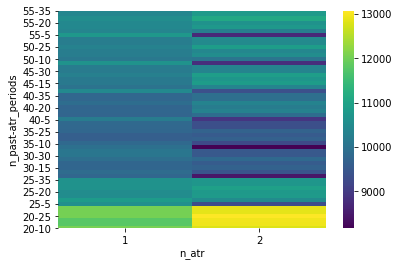

In [43]:
%matplotlib inline

import seaborn as sns


sns.heatmap(hm[::-1], cmap='viridis')

実際には、2σが口座の2パーセントの金額になるように取引数量を決める